In [48]:
import numpy as np
from matplotlib import pyplot as plt

In [49]:
x = np.array([1, 2, 3, 4])
f_x = np.array([1.5, 2.2, 3.1, 4.3])
M_0, M_n = 0, 0
h = 2 - 1

In [50]:
n = len(x)

In [51]:
A = np.zeros((len(x), len(x)))
A[0, 0] = 1
A[-1, -1] = 1

for i in range(1, n-1):
    A[i, i-1:i+2] = np.array([1,4,1])

In [52]:
D = np.zeros((len(x), 1))
D[0][0], D[-1][0] = M_0, M_n
for i in range(1, n - 1):
    D[i][0] = 6 * (f_x[i + 1] - 2 * f_x[i] + f_x[i - 1]) / (h**2)

In [53]:
M = ((np.linalg.inv(A) @ D))

In [54]:
M

array([[0. ],
       [0.2],
       [0.4],
       [0. ]])

In [55]:
target_x = 1.2
diff = ((target_x - x) > 0) * (target_x - x)
diff += ((target_x - x) <= 0) * (np.max(diff) + 1)

idx = np.argmin(diff)

In [56]:
value_1 = M[idx] * (((x[idx + 1] - target_x) ** 3) / h - h * (x[idx + 1] - target_x)) / 6
value_2 = f_x[idx] * (x[idx + 1] - target_x) / h
value_3 = M[idx + 1] * (((target_x - x[idx]) ** 3) / h - h * (target_x - x[idx])) / 6
value_4 = f_x[idx + 1] * (target_x - x[idx]) / h

In [57]:
value_1 + value_2 + value_3 + value_4

array([1.6336])

In [58]:
target_x = 2.7
diff = ((target_x - x) > 0) * (target_x - x)
diff += ((target_x - x) <= 0) * (np.max(diff) + 1)

idx = np.argmin(diff)

In [59]:
idx

1

In [60]:
value_1 = M[idx] * ((-3) * ((x[idx+1] - target_x) ** 2) + h) / 6
value_2 = -1 * f_x[idx] / h
value_3 = M[idx + 1] * ((-3) * ((target_x - x[idx]) ** 2) - h) / 6
value_4 = f_x[idx + 1] / h

value_1 + value_2 + value_3 + value_4

array([0.75966667])

In [61]:
def get_arg(target_x, X):
    diff = X - target_x
    arg_min = np.argsort(diff)

    for i in arg_min:
        if diff[i] >= 0:
            if i - 1 >= 0:
                return i - 1
            else:
                return 0

In [62]:
def poly_val(M, x, f_x, target_x):
    idx = get_arg(target_x, x)

    value_1 = (
        M[idx] * (((x[idx + 1] - target_x) ** 3) / h - h * (x[idx + 1] - target_x)) / 6
    )
    value_2 = f_x[idx] * (x[idx + 1] - target_x) / h
    value_3 = (
        M[idx + 1] * (((target_x - x[idx]) ** 3) / h - h * (target_x - x[idx])) / 6
    )
    value_4 = f_x[idx + 1] * (target_x - x[idx]) / h

    return value_1 + value_2 + value_3 + value_4

In [64]:
poly_val(M, x, f_x, 1.2)

array([1.6336])

In [65]:
slope_val(M, x, f_x, 1)

0.666666666666667

In [66]:
def get_arg_mul(target_x, X):
    diff = np.ndarray((target_x.shape[0], X.shape[0]))
    for i in range(target_x.shape[0]):
        diff[i] = X - target_x[i]

    arg_min = np.argsort(diff, axis = 1)
    res = np.ndarray((target_x.shape[0]))

    for i in range(arg_min.shape[0]):
        for j in range(arg_min.shape[1]):
            if diff[i, j] >= 0:
                if j - 1 >= 0:
                    res[i] = j - 1
                else:
                    res[i] = 0
                break
    
    return res.astype(np.int32)


In [67]:
def poly_val_mul(M, x, f_x, target_x):
    idx = get_arg_mul(target_x, x)
    M = M.T.squeeze()
    value_1 = (
        M[idx] * (((x[idx + 1] - target_x) ** 3) / h - h * (x[idx + 1] - target_x)) / 6
    )
    value_2 = f_x[idx] * (x[idx + 1] - target_x) / h
    value_3 = (
        M[idx + 1] * (((target_x - x[idx]) ** 3) / h - h * (target_x - x[idx])) / 6
    )
    value_4 = f_x[idx + 1] * (target_x - x[idx]) / h

    return value_1 + value_2 + value_3 + value_4

In [68]:
get_arg_mul(np.array([1.2, 3.3, 2.4]), x)

array([0, 2, 1])

In [69]:
poly_val_mul(M, x, f_x, np.array([1.2, 1.3, 2.4]))

array([1.6336, 1.7009, 2.5248])

In [70]:
poly_val(M, x, f_x, 1.4)

array([1.7688])

In [71]:
M, A, D

(array([[0. ],
        [0.2],
        [0.4],
        [0. ]]),
 array([[1., 0., 0., 0.],
        [1., 4., 1., 0.],
        [0., 1., 4., 1.],
        [0., 0., 0., 1.]]),
 array([[0. ],
        [1.2],
        [1.8],
        [0. ]]))

In [72]:
x = np.array([1, 2, 3, 4])
f_x = np.array([1.5, 2.2, 3.1, 4.3])
M_0, M_n = 0, 0
h = 2 - 1

A = np.zeros((len(x), len(x)))
A[0, 0] = 1
A[-1, -1] = 1

for i in range(1, n - 1):
    A[i, i - 1 : i + 2] = np.array([1, 4, 1])

B = D.copy()

In [73]:
for i in range(1, A.shape[0]):
    temp =  A[i, i - 1] / A[i-1, i-1]
    A[i, :] -= A[i-1, :] * temp
    B[i, :] -= B[i-1, :] * temp

    temp = A[i, i]
    A[i, :] /= temp
    B[i, :] /= temp

In [74]:
A, B

(array([[1.        , 0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.25      , 0.        ],
        [0.        , 0.        , 1.        , 0.26666667],
        [0.        , 0.        , 0.        , 1.        ]]),
 array([[0. ],
        [0.3],
        [0.4],
        [0. ]]))

In [75]:
res = np.ndarray(B.shape)
res[-1] = B[-1]

for i in reversed(range(A.shape[0] - 1)):
    res[i] = B[i] - A[i, i+1] * res[i+1]

In [76]:
res

array([[0. ],
       [0.2],
       [0.4],
       [0. ]])

In [77]:
def thomas_algorithm(A, D):
    for i in range(1, A.shape[0]):
        temp =  A[i, i - 1] / A[i-1, i-1]
        A[i, :] -= A[i-1, :] * temp
        D[i, :] -= D[i-1, :] * temp

        temp = A[i, i]
        A[i, :] /= temp
        D[i, :] /= temp

    res = np.ndarray(D.shape)
    res[-1] = D[-1]

    for i in reversed(range(A.shape[0] - 1)):
        res[i] = D[i] - A[i, i+1] * res[i+1]

    return res

In [78]:
def form_tri_dia_system(x, f_x, M_0 = 0, M_n = 0):
    h = x[1] - x[0]
    n = len(x)
    A = np.zeros((len(x), len(x)))
    A[0, 0] = 1
    A[-1, -1] = 1

    for i in range(1, n - 1):
        A[i, i - 1 : i + 2] = np.array([1, 4, 1])

    D = np.zeros((len(x), 1))
    D[0][0], D[-1][0] = M_0, M_n
    for i in range(1, n - 1):
        D[i][0] = 6 * (f_x[i + 1] - 2 * f_x[i] + f_x[i - 1]) / (h**2)

    return A, D

In [79]:
M = thomas_algorithm(*form_tri_dia_system(x, f_x))

In [80]:
form_tri_dia_system(x, f_x)

(array([[1., 0., 0., 0.],
        [1., 4., 1., 0.],
        [0., 1., 4., 1.],
        [0., 0., 0., 1.]]),
 array([[0. ],
        [1.2],
        [1.8],
        [0. ]]))

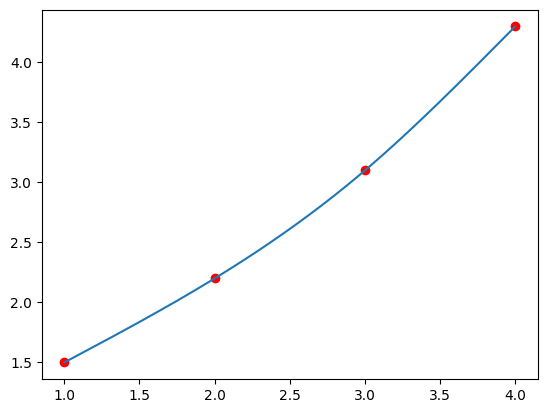

In [81]:
X = np.linspace(1, 4, 10_000)
plt.plot(X, poly_val_mul(M, x, f_x, X))
plt.scatter(x, f_x, c='red')

In [82]:
x = np.linspace(0, 5, 6)
f_x = np.exp(x) - x**3

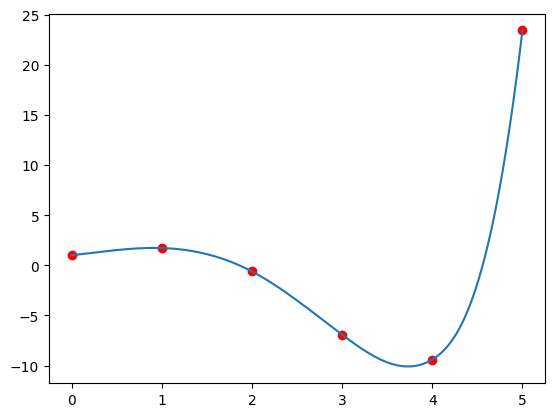

In [83]:
M = thomas_algorithm(*form_tri_dia_system(x, f_x, 1, np.exp(5) - 30))
X = np.linspace(0, 5, 10_000)
plt.plot(X, poly_val_mul(M, x, f_x, X))
plt.scatter(x, f_x, c='red')

In [107]:
def slope_val(M, x, f_x, target_x):
    idx = get_arg(target_x, x)
    M = M.squeeze()
    h = x[1] - x[0]
    value_1 = M[idx] * ((-3) * ((x[idx + 1] - target_x) ** 2) + h) / 6
    value_2 = -1 * f_x[idx] / h
    value_3 = M[idx + 1] * ((-3) * ((target_x - x[idx]) ** 2) - h) / 6
    value_4 = f_x[idx + 1] / h

    return value_1 + value_2 + value_3 + value_4

In [111]:
x = np.array([1, 2, 3, 4])
f_x = np.array([1.5, 2.2, 3.1, 4.3])
M_0, M_n = 0, 0
h = 2 - 1

M = thomas_algorithm(*form_tri_dia_system(x, f_x))

slope_val(M, x, f_x, 1.99), slope_val(M, x, f_x, 2.01)

(0.568656666666667, 0.7686366666666666)

In [ ]:
def slope_val_mul(M, x, f_x, target_x):
    idx = get_arg_mul(target_x, x)
    h = x[1] - x[0]
    M = M.T.squeeze()
    value_1 = M[idx] * ((-3) * ((x[idx + 1] - target_x) ** 2) + h) / 6
    value_2 = -1 * f_x[idx] / h
    value_3 = M[idx + 1] * ((-3) * ((target_x - x[idx]) ** 2) - h) / 6
    value_4 = f_x[idx + 1] / h

    return value_1 + value_2 + value_3 + value_4

In [ ]:
slope_val_mul(M, x, f_x, np.array([2.4, 3.4, 4.4]))

array([-6.55829694, -8.18302763,  3.29951319])